In [4]:
from game import UltimateTicTacToe
from player import Player
from MCTS_player import MCTSPlayer
from board import Board
from AlphaBeta_player import AlphaBetaMiniMaxPlayer

from tqdm import tqdm
from collections import Counter, defaultdict
import numpy as np

import matplotlib.pyplot as plt

In [2]:
for r in range(1, 16):
    p1 = Player(1)
    p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=0.2, n_rollouts=r)

    game = UltimateTicTacToe(p1, p2, grid_size=2)

    gameplay = []
    for _ in tqdm(range(20)):
        gameplay.append(game.play_game())
    print(r, Counter(gameplay))

100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


1 Counter({1: 11, 2: 9})


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


2 Counter({1: 10, 2: 10})


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


3 Counter({2: 12, 1: 8})


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


4 Counter({1: 11, 2: 9})


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


5 Counter({2: 12, 1: 8})


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


6 Counter({1: 11, 2: 9})


100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


7 Counter({1: 12, 2: 8})


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


8 Counter({2: 10, 1: 10})


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


9 Counter({2: 12, 1: 8})


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


10 Counter({1: 11, 2: 9})


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


11 Counter({1: 10, 2: 10})


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


12 Counter({1: 13, 2: 7})


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


13 Counter({1: 12, 2: 8})


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


14 Counter({1: 13, 2: 7})


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]

15 Counter({2: 12, 1: 8})


In [3]:
Counter(gameplay)

Counter({2: 12, 1: 8})

In [4]:
# testing on a 2x2 grid
results = defaultdict()
i = 0
for calc_time in np.arange(0.1, 0.6, 0.1):
    for n_rollouts in range(5, 26, 5):
        p1 = Player(1)
        p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=calc_time, n_rollouts=30)

        game = UltimateTicTacToe(p1, p2, grid_size=2)

        gameplay = []
        for _ in tqdm(range(20)):
            gameplay.append(game.play_game())

        gameplay = Counter(gameplay)
        results[i] = {"params": [calc_time, n_rollouts], "results": gameplay}

        i += 1


 45%|████▌     | 9/20 [00:17<00:21,  1.99s/it]


KeyError: 'wins'

In [5]:
# testing on a 3x3 grid
p1 = MCTSPlayer(1, exploration_weight=2**0.5, calculation_time=0.2, n_rollouts=10)
p2 = Player(2)
game = UltimateTicTacToe(p1, p2, grid_size=3)

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())
Counter(results)


100%|██████████| 100/100 [09:58<00:00,  5.99s/it]


Counter({1: 71, 2: 17, -1: 12})

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/rt/y418zwhn7mv6tf_kxcm3nbtm0000gn/T/ipykernel_79181/3197770978.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sqrt{2}$ learning weight, 0.2s calculation time, 10 rollouts per simulation")


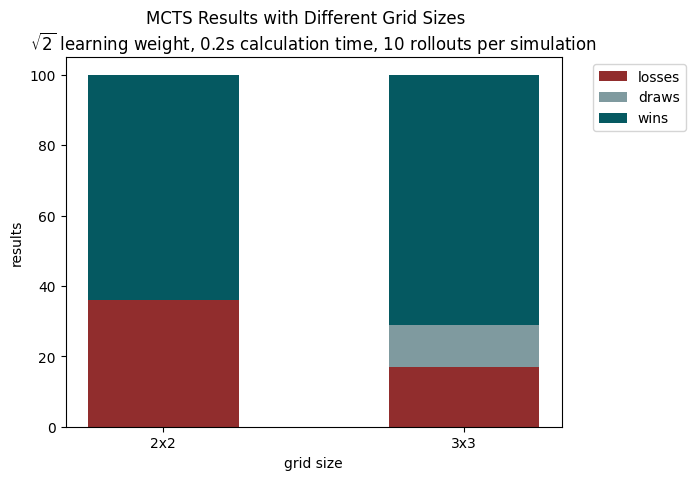

In [56]:
x = ["2x2", "3x3"]
width = 0.5

fig, ax = plt.subplots(facecolor="none")
bottom = np.zeros(2)

results = {'losses':[36,17],'draws':[0,12],'wins':[64,71]}

colors = ["#912d2d", "#7f9a9f", "#055961"]
i = 0
for label, res in results.items():
    p = ax.bar(x, res, width, label=label, bottom=bottom, color=colors[i])
    bottom += res
    i += 1

plt.xlabel("grid size")
plt.ylabel("results")
plt.title("$\sqrt{2}$ learning weight, 0.2s calculation time, 10 rollouts per simulation")
plt.suptitle("MCTS Results with Different Grid Sizes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [6]:
# testing on a 3x3 grid
p1 = MCTSPlayer(1, exploration_weight=2**0.5, calculation_time=0.2, n_rollouts=10)
p2 = Player(2)
game = UltimateTicTacToe(p1, p2, grid_size=2)

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())
Counter(results)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Counter({1: 64, 2: 36})

In [12]:
p1 = Player(1)
p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=0.1, n_rollouts=25)
game = UltimateTicTacToe(p1, p2, grid_size=2)

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())
Counter(results)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


Counter({2: 67, 1: 33})

In [16]:
p1 = Player(1)
p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=0.1, n_rollouts=25)
game = UltimateTicTacToe(p1, p2, grid_size=3)

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())
Counter(results)

100%|██████████| 100/100 [06:01<00:00,  3.61s/it]


Counter({2: 37, 1: 37, -1: 26})

In [3]:
wins = []
losses = []
ties = []
for calc_time in np.arange(0.1, 1.1, 0.1):
    p1 = Player(1)
    p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=calc_time, n_rollouts=30)

    game = UltimateTicTacToe(p1, p2)

    results = []
    for _ in tqdm(range(100)):
        results.append(game.play_game())

    results = Counter(results)
    wins.append(results[2])
    losses.append(results[1])
    ties.append(results[-1])

  2%|▏         | 2/100 [00:08<07:03,  4.32s/it]


KeyboardInterrupt: 

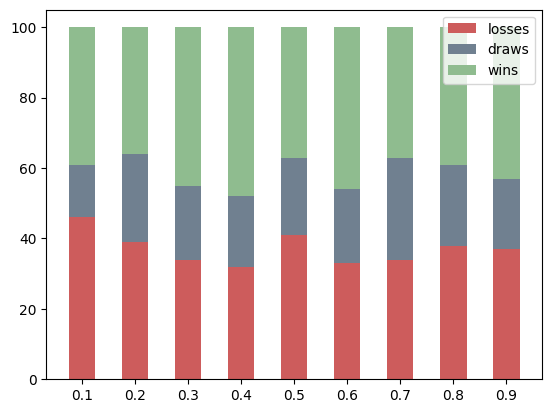

In [82]:
x = [str(round(x,1)) for x in np.arange(0.1,1,0.1)]
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(wins))

results = {'losses':losses,'draws':ties,'wins':wins}

colors = ["indianred", "slategrey", "darkseagreen"]
i = 0
for label, res in results.items():
    p = ax.bar(x, res, width, label=label, bottom=bottom, color=colors[i])
    bottom += res
    i += 1

plt.legend()
plt.show()

In [84]:
wins = []
losses = []
ties = []
for rollouts in np.arange(5, 10):
    p1 = Player(2)
    p2 = MCTSPlayer(1, exploration_weight=2**0.5, calculation_time=0.1, n_rollouts=rollouts)

    game = UltimateTicTacToe(p1, p2)

    results = []
    for _ in tqdm(range(10)):
        results.append(game.play_game())

    results = Counter(results)
    wins.append(results[2])
    losses.append(results[1])
    ties.append(results[-1])

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


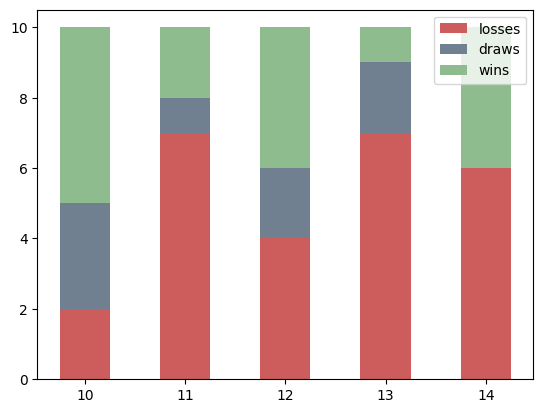

In [86]:
x = np.arange(10,15)
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(wins))

results = {'losses':losses,'draws':ties,'wins':wins}

colors = ["indianred", "slategrey", "darkseagreen"]
i = 0
for label, res in results.items():
    p = ax.bar(x.astype(str), res, width, label=label, bottom=bottom, color=colors[i])
    bottom += res
    i += 1

plt.legend()
plt.show()

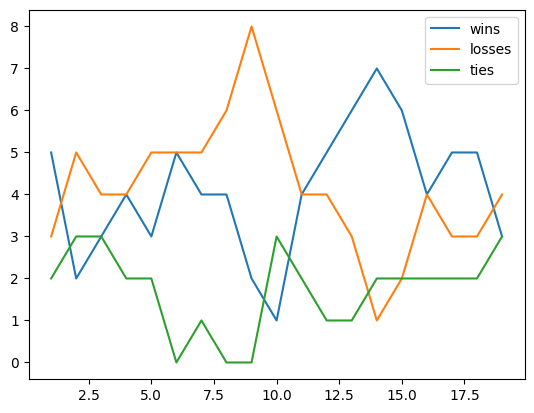

In [21]:
x = np.arange(1, 20)
plt.plot(x, wins, label="wins")
plt.plot(x, losses, label="losses")
plt.plot(x, ties, label="ties")

plt.legend()
plt.show()

In [5]:
p1 = Player(1)
p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=1, n_rollouts=20)

game = UltimateTicTacToe(p1, p2)

results = []
for _ in tqdm(range(10)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 10/10 [05:12<00:00, 31.21s/it]

Counter({-1: 4, 2: 4, 1: 2})


In [ ]:
p2 = Player(2)
p1 = MCTSPlayer(1, exploration_weight=2**0.5, calculation_time=1, n_rollouts=20)

game = UltimateTicTacToe(p1, p2)

results = []
for _ in tqdm(range(10)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

Counter({1: 6, -1: 2, 2: 2})


In [8]:
p1 = MCTSPlayer(1, exploration_weight=1, calculation_time=0.2, n_rollouts=10)
p2 = MCTSPlayer(2, exploration_weight=2**0.5, calculation_time=0.2, n_rollouts=50)

game = UltimateTicTacToe(p1, p2)

results = []
for _ in tqdm(range(10)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 10/10 [01:11<00:00,  7.19s/it]

Counter({1: 10})


In [9]:
p1 = MCTSPlayer(1, exploration_weight=1, calculation_time=0.2, n_rollouts=10)
p2 = Player(2)

game = UltimateTicTacToe(p1, p2)

results = []
for _ in tqdm(range(10)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 10/10 [00:59<00:00,  5.94s/it]

Counter({1: 8, -1: 2})


In [5]:
p1 = Player(1)
p2 = AlphaBetaMiniMaxPlayer(2, depth=3)
game = UltimateTicTacToe(p1, p2)
game.play_game()

results = []
for _ in tqdm(range(100)):
    results.append(game.play_game())

print(Counter(results))

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]

Counter({2: 95, -1: 4, 1: 1})
